<a href="https://colab.research.google.com/github/Aayush360/Fast_AI/blob/master/Lesson_1_(Classify_iphone_and_Samsung_phone).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classifying iphone and Samsung Phone using fastai 

[Blog: Source](https://becominghuman.ai/fast-ai-v3-2019-lesson-1-image-classification-db93bb63e819) 


### Import Dependencies

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
# Specify the classes of Image

classes = ['iphone','samsung']


In [0]:
# Specifying Path 


path = Path('/content/images')
for file, folder in [('iphone.csv', 'iphone'), ('samsung.csv', 'samsung')]:
    dest = path/folder # path + '/' + folder
    dest.mkdir(parents=True, exist_ok=True)
    download_images(path/file, dest)

In [7]:
for folder in ('iphone', 'samsung'):
    print(folder)
    verify_images(path/folder, delete=True, max_size=500)

iphone


samsung


In [0]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

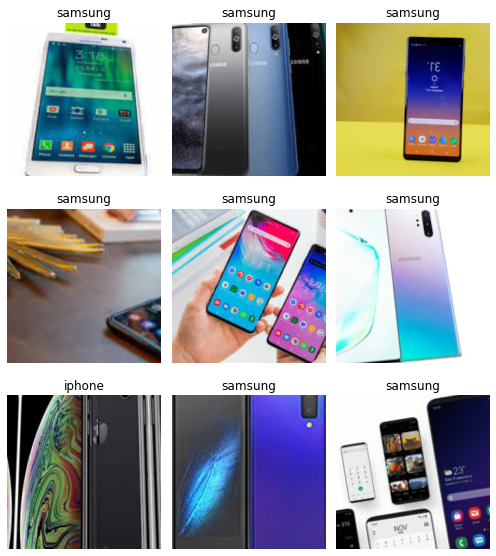

In [9]:
# visualizing the image

data.show_batch(rows=3, figsize=(7,8))

### Training our CNN with a single hidden layer

In [10]:
# Training the model
# we will use CNN with single hidden layer as classifier
# it will give an output that belongs to one of the three category
# let us run for 4 epochs for training

learn = create_cnn(data, models.resnet34, metrics=error_rate)



/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [11]:
# 4 tells to cycle the dataset for 4 times 

learn.fit_one_cycle(4)


epoch,train_loss,valid_loss,error_rate,time
0,1.205628,0.476432,0.173469,00:09
1,0.879100,0.312198,0.122449,00:06
2,0.702803,0.247306,0.132653,00:06
3,0.599185,0.245609,0.122449,00:06


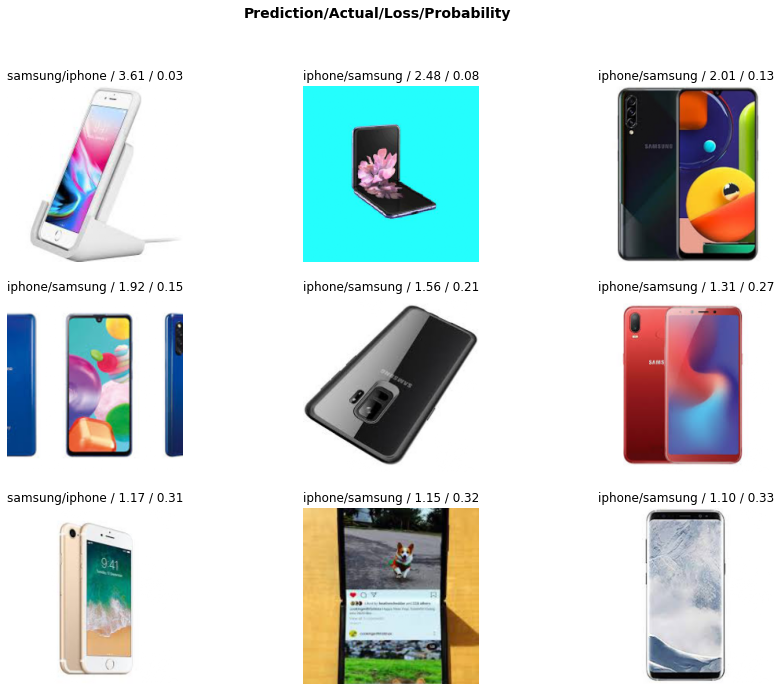

In [12]:
interp = ClassificationInterpretation.from_learner(learn) 

# gives the instances when the model was confident on the wrong actual prediction

interp.plot_top_losses(9, figsize=(15,11))


In [13]:
# we can use most_cofused metric to tell when the model was confused most of the time

interp.most_confused(min_val=2)

ERROR! Session/line number was not unique in database. History logging moved to new session 59


[('samsung', 'iphone', 9), ('iphone', 'samsung', 3)]

In [0]:
# saving our model

learn.save('stage-1')

### Unfreezing the model and fintuning it

In [0]:
learn.unfreeze()


In [16]:
# let us try to find out the learning rate at which the model learns most quickly

learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


### Plotting learning rate against the loss

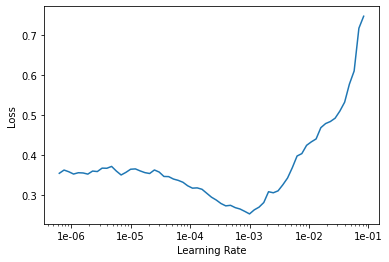

In [17]:
learn.recorder.plot()

In [0]:
# the above graph tells that the loss increases once it crosses e-03,

In [22]:
# Once again train the model with 2 epochs, this time specifying the learning rate
# slice parameter tells what rate to train our first and last layer

learn.fit_one_cycle(2, max_lr=slice(2.5e-5,3e-3))


# Now the error rate has decreased from 12% to 7%, i.e to say, now it can classify 93 images correctly out of 100 given images.

epoch,train_loss,valid_loss,error_rate,time
0,0.049936,0.315114,0.091837,00:07
1,0.063512,0.268180,0.071429,00:07


In [0]:
'''
Making the model better: 

Tune the number of epochs
Keep tuning the learning rate
Tune the batch size
Try more layers, i.e. using a resnet50 instead of 34'''